In [1]:
# Import libaries
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(rc={'figure.figsize':(16,9)})
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
# Read the datasets
olist_customers = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [3]:
# Merge the datasets
olist_new = olist_orders.merge(olist_items, on='order_id', how='left')
olist_new = olist_new.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
olist_new = olist_new.merge(olist_reviews, on='order_id', how='outer')
olist_new = olist_new.merge(olist_products, on='product_id', how='outer')
olist_new = olist_new.merge(olist_customers, on='customer_id', how='outer')
olist_new = olist_new.merge(olist_sellers, on='seller_id', how='outer')


In [4]:
# Explore data
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

resumetable(olist_new)

Dataset Shape: (119143, 39)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,16.44
4,order_approved_at,object,177,90733,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,16.28
5,order_delivered_carrier_date,object,2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
6,order_delivered_customer_date,object,3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.40
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,8.47
8,order_item_id,float64,833,21,1.0,1.0,1.0,0.72
9,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.63


In [5]:
# Organize work 
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id', 
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']
#categorical columns
cat_cols = olist_new.nunique()[olist_new.nunique() <= 27].keys().tolist()
# cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in olist_new.columns if x not in cat_cols + id_cols]

#Binary columns with 2 values
bin_cols = olist_new.nunique()[olist_new.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

olist_new.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


In [6]:
# Customer Analysis
# What regions have high demand?
# In what months?

In [7]:
# Time-stamp related data
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in timestamp_cols:
    olist_new[col] = pd.to_datetime(olist_new[col])

# Time-Stamps transition
olist_new['purchase_year'] = olist_new['order_purchase_timestamp'].dt.year
olist_new['purchase_month'] = olist_new['order_purchase_timestamp'].dt.month
olist_new['purchase_day'] = olist_new['order_purchase_timestamp'].dt.day
olist_new['purchase_day_of_week'] = olist_new['order_purchase_timestamp'].dt.dayofweek
olist_new['purchase_hour'] = olist_new['order_purchase_timestamp'].dt.hour


In [8]:
# Number of orders per year
orders_per_year = olist_new['purchase_year'].value_counts().sort_index()

# Number of orders per month
orders_per_month = olist_new.groupby('purchase_month').size()

# Number of orders per day of the week
orders_per_day_of_week = olist_new['purchase_day_of_week'].value_counts().sort_index()

# Number of orders per hour
orders_per_hour = olist_new['purchase_hour'].value_counts().sort_index()

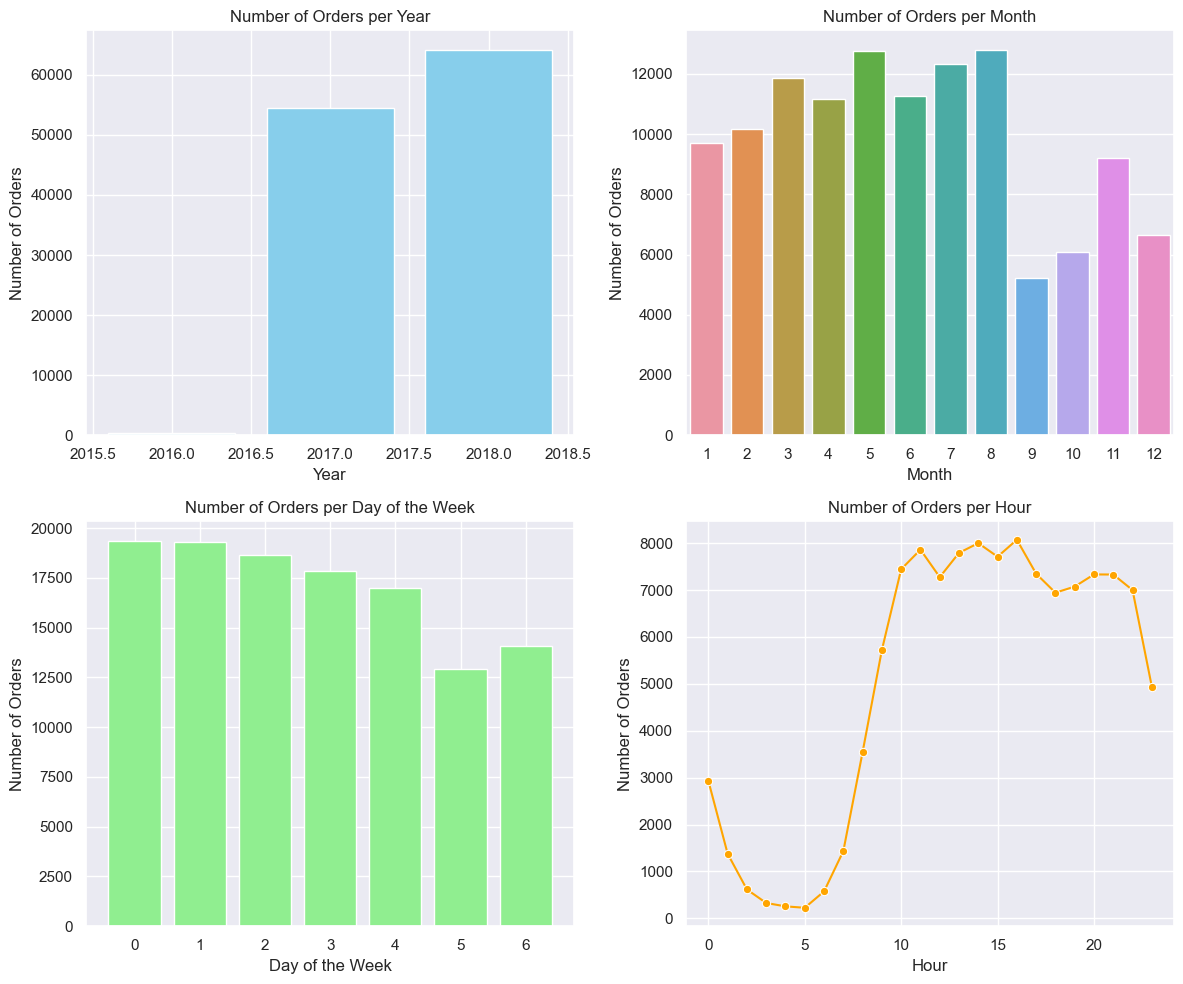

In [9]:
# Create subplots for each graph
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot number of orders per year
axes[0, 0].bar(orders_per_year.index, orders_per_year.values, color='skyblue')
axes[0, 0].set_title('Number of Orders per Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Orders')

# Plot number of orders per month
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, ax=axes[0, 1])
axes[0, 1].set_title('Number of Orders per Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Orders')

# Plot number of orders per day of the week
axes[1, 0].bar(orders_per_day_of_week.index, orders_per_day_of_week.values, color='lightgreen')
axes[1, 0].set_title('Number of Orders per Day of the Week')
axes[1, 0].set_xlabel('Day of the Week')
axes[1, 0].set_ylabel('Number of Orders')
axes[1, 0].set_xticks(range(7))  # Set x-axis ticks for day of the week

# Plot number of orders per hour
sns.lineplot(x=orders_per_hour.index, y=orders_per_hour.values, ax=axes[1, 1], marker='o', color='orange')
axes[1, 1].set_title('Number of Orders per Hour')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Number of Orders')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

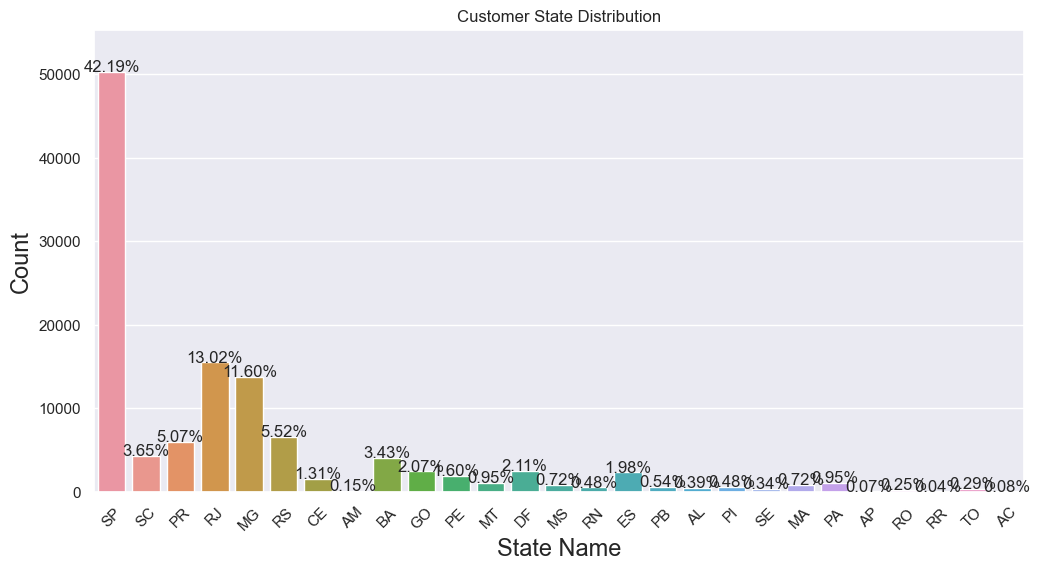

In [10]:
plt.figure(figsize=(12, 6))
plt.title('Customer State Distribution', fontsize=12)

# Plot countplot for customer state distribution
g = sns.countplot(x='customer_state', data=olist_new, orient='h')
g.set_xlabel("State Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(height / len(olist_new) * 100),
           ha="center", fontsize=12)
g.set_ylim(0, max(sizes) * 1.1)

plt.show()
